In [2]:
import pandas as pd

df_c2c = pd.read_csv('reference/country2code.csv',
    names=['country','country_code']
).set_index('country')  #country2code.csv是转换器文件

df_s = pd.read_csv(  
    'reference/code&country.csv',names=['country_code','country']
).set_index('country_code')  #这是完整且不重复的国家表，用于需要分国家的地图中，用于存储每一个国家的数据，s代表store

def city2country(t):
    return t.split(', ')[-1]

def city2countrycode(t):
    return df_c2c.loc[t.split(', ')[-1],'country_code']  #convert countries into codes

def code2country(t):
    return df_s.loc[t,'country']

In [3]:
from dateutil.parser import parse

df_gh = pd.read_csv(
    'reference/journalists-data-including-github-contributions.csv'
)   #这是记者们的2008年以来每天的github contribution
df_0d = df_gh.reindex(
    ['name','institution','city','github'],axis=1
)   #这是去除github contribution后的记者信息
df_0d['country'] = df_gh['city'].apply(city2country)
df_0d['country_code'] = df_gh['city'].apply(city2countrycode)  #将所有记者的country转化为code
df_0d['contribution_sum'] = df_gh.iloc[:,4:].aggregate('sum',axis=1).astype("int")
df_0d['name & country'] = df_0d['name'] + '(' + df_0d['country'] + ')'
    #这是转置后纯粹的时间信息

df_d = df_gh.loc[:,'2018-10-31':'2008-01-01'].join(
    df_0d['country_code'].apply(code2country)
).groupby('country_code').aggregate('sum').T
df_d['dd'] = df_d.index
df_d['datetime'] = df_d['dd'].apply(parse)
df_d = df_d.set_index('datetime').resample('1D').aggregate('sum')
df_accumulate = df_d.T[df_d.sum() > 5000].T
for m in df_accumulate:
    for i in range(1,len(df_accumulate.index)):
        df_accumulate[m][i]+=df_accumulate[m][i-1]

df_d = df_gh.loc[:,'2018-10-31':'2008-01-01'].join(
    df_0d['country_code'].apply(code2country)
).groupby('country_code').aggregate('sum').T
df_d['dd'] = df_d.index
df_d['datetime'] = df_d['dd'].apply(parse)
df_d = df_d.set_index('datetime').resample('2M').aggregate('sum')
df_sum = df_d.T[df_d.sum() > 5000].T



In [21]:
df_gt = pd.read_csv('reference/multiTimeline.csv',names=['month','trend'])[2:]
df_gt['trend'] = df_gt['trend'].astype('int')
df_gt = df_gt.set_index(df_gt['month'].apply(parse)).drop('month',axis=1).resample('2M').aggregate('sum')
df_gt

,trend
month,
2008-12-31,6
2009-02-28,6
2009-04-30,25
2009-06-30,29
2009-08-31,13
2009-10-31,21
2009-12-31,21
2010-02-28,27
2010-04-30,17


Text(0.5,1,'Global Data Journalist Google Trend Index')

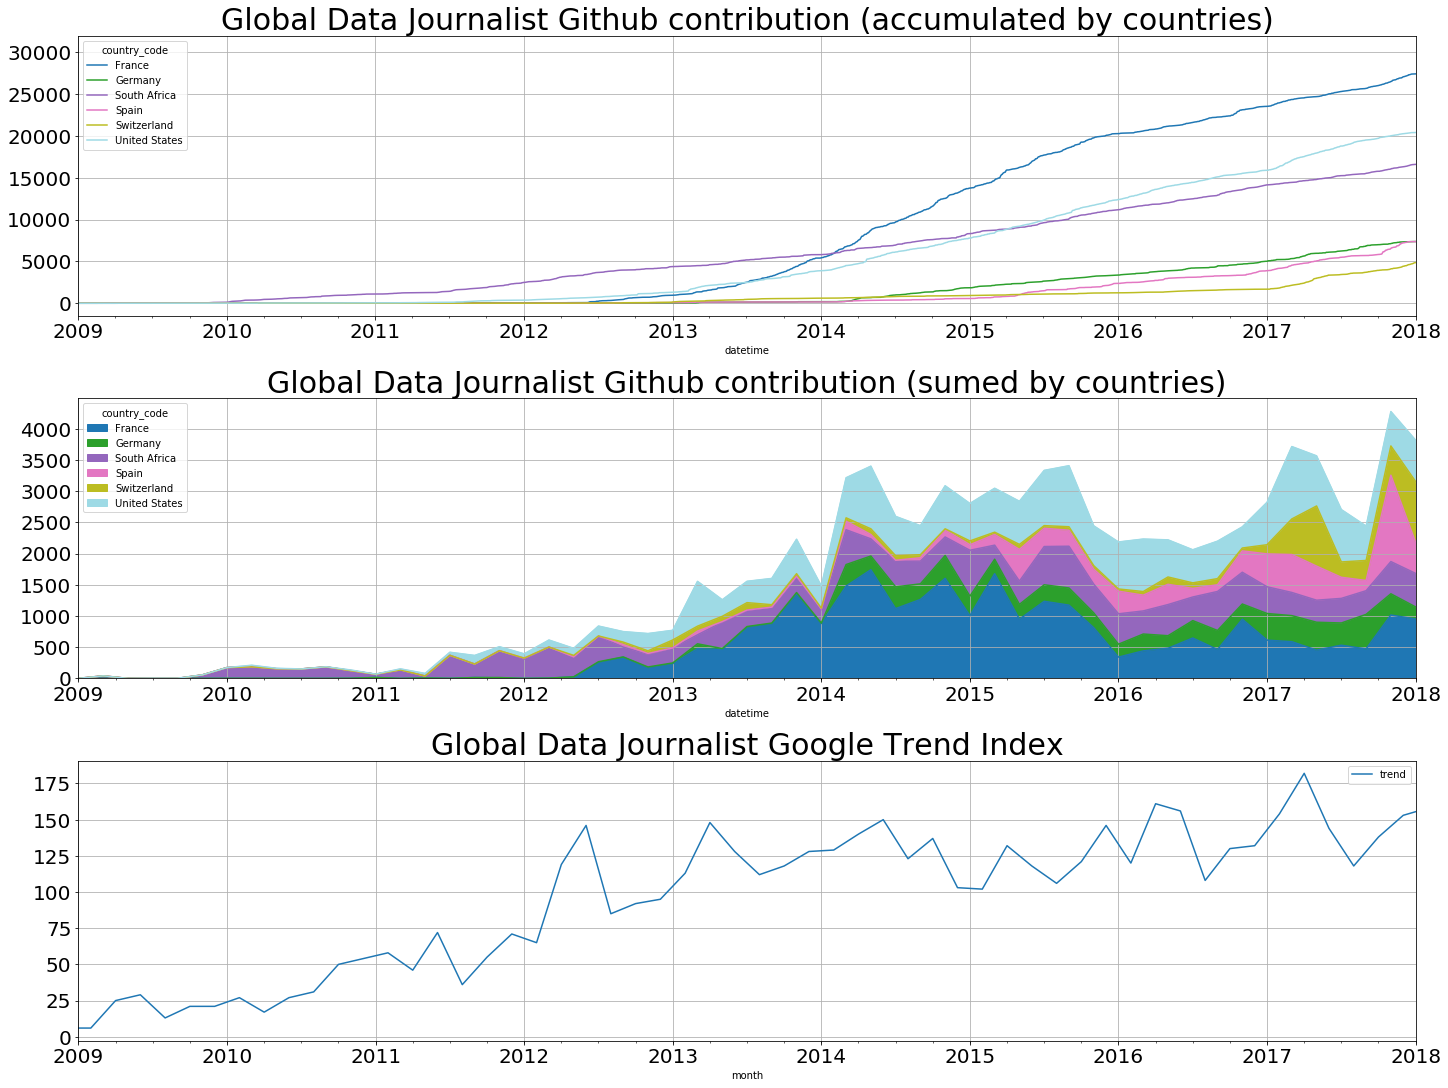

In [24]:
from matplotlib import colors as mcl
from matplotlib import pyplot as plt
# colors = [
#     [0.0, '#FDFCF3'],
#     [0.25, "beige"],
#     [1.0, "skyblue"],
# ]
# my_cmap = mcl.LinearSegmentedColormap.from_list("", colors)

fig, axes = plt.subplots(nrows=3, ncols=1,constrained_layout=True)
ax0 = df_accumulate.plot.line(
    fontsize = 20,
    grid = True,
    figsize = (20,15),
    cmap = 'tab20',
    xlim = ('2009','2018'),
    ax=axes[0])
ax0.set_title('Global Data Journalist Github contribution (accumulated by countries)', fontsize=30)

ax1 = df_sum.plot.area(
    fontsize = 20,
    grid = True,
    figsize = (20,15),
    colormap = 'tab20',
    xlim = ('2009','2018'),
    ax=axes[1])
ax1.set_title('Global Data Journalist Github contribution (sumed by countries)', fontsize=30)

ax2 = df_gt.plot.line(
    fontsize = 20,
    grid = True,
    figsize = (20,15),
    colormap = 'tab20',
    xlim = ('2009','2018'),
    ax=axes[2])
ax2.set_title('Global Data Journalist Google Trend Index', fontsize=30)